In [2]:
import copy
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [201]:
N = 100 #number of nodes
M = 10 # number of communities 
#p = 0.1# replacement probability
intragroup_freq = M/N
extragroup_freq = (1-M/N)/(M-1)/100
random_freq = extragroup_freq/10
#random_freq = extra_group_freq

NameError: name 'extra_group_freq' is not defined

In [4]:
print(intragroup_freq)
print(extragroup_freq)
print(random_freq)


0.1
0.001
0


In [5]:
G = nx.random_partition_graph([int(N/M)]*M,0.8,0.05)
nx.set_edge_attributes(G, extragroup_freq, 'freq')

for part in G.graph['partition']:
    sub = G.subgraph(part)
    nx.set_edge_attributes(sub, intragroup_freq, 'freq')


In [6]:
'''
nodeset = set(range(N))
groups = {x: set() for x in range(M)}

while len(nodeset) > 0:
    nset = np.array(list(nodeset))
    node = np.random.choice(nset, 1)[0]
    group = np.random.choice(np.arange(M), 1)[0]
    groups[group] = groups[group] | {node}
    if np.random.rand() > p :
        nodeset = nodeset - {node}
'''

'\nnodeset = set(range(N))\ngroups = {x: set() for x in range(M)}\n\nwhile len(nodeset) > 0:\n    nset = np.array(list(nodeset))\n    node = np.random.choice(nset, 1)[0]\n    group = np.random.choice(np.arange(M), 1)[0]\n    groups[group] = groups[group] | {node}\n    if np.random.rand() > p :\n        nodeset = nodeset - {node}\n'

In [7]:
#G = nx.Graph()

#for g in groups:
    #sub = nx.complete_graph(groups[g])
    #nx.set_edge_attributes(sub, 0.98, 'freq')
    #G = nx.compose(sub, G)


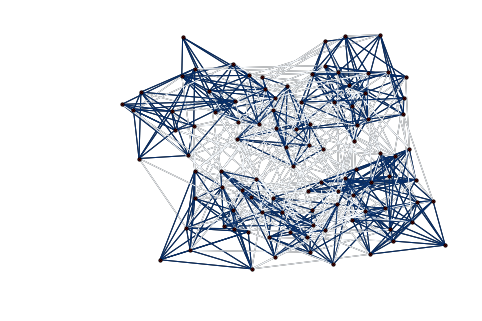

In [8]:

position = nx.spring_layout(G)
nx.draw(G, pos = position, node_size=10)
Gedges,Gweights = zip(*nx.get_edge_attributes(G,'freq').items())
nx.draw(G, pos = position, node_color='k', edgelist=Gedges, edge_color=Gweights, width=1.0, node_size = 1, edge_cmap=plt.cm.Blues)


In [9]:
edgeswap = N**2
H = G.copy()
#nx.double_edge_swap(H,nswap=edgeswap, max_tries=edgeswap*10)
#nx.draw(H, pos = position, node_size = 10)

In [73]:
G_edges = {e for e in G.edges}

Comm = nx.complete_graph(N)
Comm_edges = {e for e in Comm.edges}
for e in Comm_edges:
    if e in G_edges:
        #print(e)
        Comm.edges[e]['freq'] = G.edges[e]['freq']
    else :
        Comm.edges[e]['freq'] = random_freq
#Cedges,Cweights = zip(*nx.get_edge_attributes(G,'freq').items())
#nx.draw(Comm, pos = position, node_color='b', edgelist=edges, edge_color=weights, width=1.0, node_size = 10, edge_cmap=plt.cm.Blues)
#n, bins, patches = plt.hist(Cweights, 30, normed=1, facecolor='green', alpha=0.75)
#plt.show()


In [11]:
'''
trialtime = 1000
infection = 0.03
recovery = 0.1
steps = 2
infectionsize = np.zeros([steps, trialtime])
for s in range(steps):
    infection_thresh = s/(steps-1)
    infected_nodes = set()
    clean_nodes = set(range(N))- infected_nodes
    nx.set_edge_attributes(G, extragroup_freq, 'freq')

    for part in G.graph['partition']:
        sub = G.subgraph(part)
        nx.set_edge_attributes(sub, intragroup_freq, 'freq')

    for e in Comm_edges:
        if e in G_edges:
            #print(e)
            Comm.edges[e]['freq'] = G.edges[e]['freq']
        else :
            Comm.edges[e]['freq'] = random_freq
    for t in range(trialtime):
        infectionsize[s][t] = len(infected_nodes)/N
        
        
        if t > 10 and infectionsize[s][t]  <= 1/N:
            infectionsize[s][range(t+1, trialtime)] = 0
            break
        if t > 10 and infectionsize[s][t] >= 1- 1/N:
            infectionsize[s][range(t+1, trialtime)] = 1
            break
        
        if len(clean_nodes) > 0:
            inspiration = set(np.random.choice(list(clean_nodes), int(len(clean_nodes)*infection), replace=False))
            infected_nodes.update(inspiration)
            clean_nodes = set(range(N))- infected_nodes
        
        
        
        node = np.random.choice(range(N), 1, replace=False)[0]
        coalition = {node}
        probit = np.random.rand(N)
        for n in set(range(N)) - {node}:
            if probit[n] < Comm.edges[node, n]['freq']:
                coalition = coalition | {n}
        neighbors = set()
        for member in coalition:
            neighbors.update({n for n in H.neighbors(member)})
        
        neighbors =  neighbors - coalition
        coal = list(coalition)
        
        if len(neighbors) - len(infected_nodes.intersection(neighbors)) <= infection_thresh*len(neighbors) :
            if not(coalition <= infected_nodes):
                
                for node_a in range(len(coal)):
                    for node_b in range(node_a + 1, len(coal)):
                        Comm.edges[coal[node_a], coal[node_b]]['freq'] = np.sqrt(Comm.edges[coal[node_a], coal[node_b]]['freq'])
                
                infected_nodes.update(coalition)
                clean_nodes = set(range(N))- infected_nodes
                
                        
        else :
            if not(coalition <= clean_nodes):
                clean_nodes.update(coalition)
                infected_nodes = set(range(N))- clean_nodes
                for node_a in range(len(coal)):
                    for node_b in range(node_a + 1, len(coal)):
                        Comm.edges[coal[node_a], coal[node_b]]['freq'] = (Comm.edges[coal[node_a], coal[node_b]]['freq'])**2

        infected_nodes.discard(inspiration - coalition)
        clean_nodes = set(range(N))- infected_nodes
'''

"\ntrialtime = 1000\ninfection = 0.03\nrecovery = 0.1\nsteps = 2\ninfectionsize = np.zeros([steps, trialtime])\nfor s in range(steps):\n    infection_thresh = s/(steps-1)\n    infected_nodes = set()\n    clean_nodes = set(range(N))- infected_nodes\n    nx.set_edge_attributes(G, extragroup_freq, 'freq')\n\n    for part in G.graph['partition']:\n        sub = G.subgraph(part)\n        nx.set_edge_attributes(sub, intragroup_freq, 'freq')\n\n    for e in Comm_edges:\n        if e in G_edges:\n            #print(e)\n            Comm.edges[e]['freq'] = G.edges[e]['freq']\n        else :\n            Comm.edges[e]['freq'] = random_freq\n    for t in range(trialtime):\n        infectionsize[s][t] = len(infected_nodes)/N\n        \n        \n        if t > 10 and infectionsize[s][t]  <= 1/N:\n            infectionsize[s][range(t+1, trialtime)] = 0\n            break\n        if t > 10 and infectionsize[s][t] >= 1- 1/N:\n            infectionsize[s][range(t+1, trialtime)] = 1\n            break\

In [12]:
'''
window = 1000
t = range(window)
#plt.plot(t, infectionsize[0][t], 'r+', t, infectionsize[1][t], 'b+')
plt.plot(t, infectionsize[0][t], 'b-')

plt.show()
'''

"\nwindow = 1000\nt = range(window)\n#plt.plot(t, infectionsize[0][t], 'r+', t, infectionsize[1][t], 'b+')\nplt.plot(t, infectionsize[0][t], 'b-')\n\nplt.show()\n"

In [142]:
trialtime = 1000
trialnumber = 100
#infection = 0.03

steps = 30
infection_thresh = 0.5
infectionsize = np.zeros([steps, trialtime])
coalitionsize = np.zeros([steps, trialtime])
neighboursize = np.zeros([steps, trialtime])
for test in range(trialnumber):
    for s in range(1,steps):
        infection = s/(steps)*0.5
        #print(infection)
        infected_nodes = set()
        clean_nodes = set(range(N))- infected_nodes
        nx.set_edge_attributes(G, extragroup_freq, 'freq')

        for part in G.graph['partition']:
            sub = G.subgraph(part)
            nx.set_edge_attributes(sub, intragroup_freq, 'freq')

        for e in Comm_edges:
            if e in G_edges:
                #print(e)
                Comm.edges[e]['freq'] = G.edges[e]['freq']
            else :
                Comm.edges[e]['freq'] = random_freq

        for t in range(trialtime):
            infectionsize[s][t] = infectionsize[s][t] + len(infected_nodes)/N

            if len(clean_nodes) > 0:
                inspiration = set(np.random.choice(list(clean_nodes), int(len(clean_nodes)*infection), replace=False))



            node = np.random.choice(range(N), 1, replace=False)[0]
            coalition = {node}
            probit = np.random.rand(N)
            for n in set(range(N)) - {node}:
                if probit[n] < Comm.edges[node, n]['freq']:
                    coalition = coalition | {n}
            coal = list(coalition)        
            coalitionsize[s][t] = coalitionsize[s][t] + len(coalition)

            neighbors = set()
            for member in coalition:
                neighbors.update({n for n in H.neighbors(member)})

            neighbors =  neighbors - coalition
            neighboursize[s][t] = neighboursize[s][t] + len(neighbors)
            temp = infected_nodes | inspiration
            if len(neighbors) - len(temp.intersection(neighbors)) <= infection_thresh*len(neighbors) :
                '''
                for node_a in range(len(coal)):
                    for node_b in range(node_a + 1, len(coal)):
                        Comm.edges[coal[node_a], coal[node_b]]['freq'] = np.sqrt(Comm.edges[coal[node_a], coal[node_b]]['freq'])
                '''
                infected_nodes.update(coalition)
                clean_nodes.discard(coalition)
                
            else :
                #if not(coalition <= clean_nodes):
                clean_nodes.update(coalition)
                infected_nodes.discard(coalition)
                #infected_nodes = set(range(N)) - clean_nodes
                '''
                for node_a in range(len(coal)):
                    for node_b in range(node_a + 1, len(coal)):
                        Comm.edges[coal[node_a], coal[node_b]]['freq'] = (Comm.edges[coal[node_a], coal[node_b]]['freq'])**2
                '''
            


            #clean_nodes = set(range(N))- infected_nodes
        '''
        Cedges,Cweights = zip(*nx.get_edge_attributes(Comm,'freq').items())
        Cweights = np.array(Cweights)
        Cweights = Cweights[Cweights > random_freq]
        n, bins, patches = plt.hist(Cweights, 100, normed=1, facecolor='green', alpha=0.75)
        plt.show()
        '''
infectionsize = infectionsize/trialnumber
coalitionsize = coalitionsize/trialnumber/N
neighboursize = neighboursize/trialnumber/N


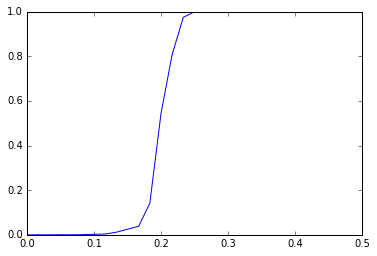

In [255]:

window = 750
t = range(1,window)
i = 6
#plt.plot(t, infectionsize[i][t], 'b-',t, coalitionsize[i][t], 'r-', t, neighboursize[i][t], 'b-')
#plt.ylim(0, 1)
reverse = infectionsize.T
plt.plot(np.arange(steps)/steps*0.5,reverse[window-1][range(steps)], 'b-')
#plt.plot(range(sum(infgectionsize[i] < 1)), np.arctanh((2*infectionsize[i][infectionsize[i] < 1]-1)), 'b-')
#plt.plot(t, coalitionsize[1][t]) 
#plt.plot(coalitionsize[i], neighboursize[i], 'b+')
plt.show()

In [107]:
infectionsize[17][range(10)]

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

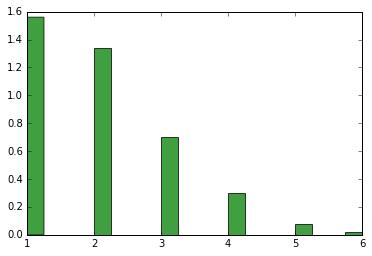

In [50]:
n, bins, patches = plt.hist(coalitionsize[5], 20, normed=1, facecolor='green', alpha=0.75)
plt.show()

In [ ]:
Cedges,Cweights = zip(*nx.get_edge_attributes(Comm,'freq').items())
#nx.draw(Comm, pos = position, node_color='b', edgelist=edges, edge_color=weights, width=1.0, node_size = 10, edge_cmap=plt.cm.Blues)
Cweights = np.array(Cweights)
Cweights = Cweights[Cweights > random_freq]
n, bins, patches = plt.hist(Cweights, 30, normed=1, facecolor='green', alpha=0.75)
plt.show()


In [241]:
infectionsize[i][infectionsize[i] <1]

array([  0.00000000e+00,   3.00000000e-04,   5.00000000e-04,
         1.30000000e-03,   1.90000000e-03,   2.40000000e-03,
         2.80000000e-03,   3.10000000e-03,   3.90000000e-03,
         4.20000000e-03,   4.50000000e-03,   4.80000000e-03,
         5.30000000e-03,   5.70000000e-03,   5.80000000e-03,
         6.00000000e-03,   6.40000000e-03,   6.90000000e-03,
         7.40000000e-03,   8.10000000e-03,   8.20000000e-03,
         8.40000000e-03,   9.00000000e-03,   9.90000000e-03,
         1.07000000e-02,   1.10000000e-02,   1.13000000e-02,
         1.18000000e-02,   1.32000000e-02,   1.38000000e-02,
         1.42000000e-02,   1.50000000e-02,   1.57000000e-02,
         1.59000000e-02,   1.64000000e-02,   1.80000000e-02,
         1.86000000e-02,   1.95000000e-02,   1.98000000e-02,
         2.04000000e-02,   2.10000000e-02,   2.13000000e-02,
         2.16000000e-02,   2.18000000e-02,   2.27000000e-02,
         2.39000000e-02,   2.43000000e-02,   2.49000000e-02,
         2.55000000e-02,

In [ ]:
G = nx.random_partition_graph([10,10,10],.25,.01)
partition = G.graph['partition']

In [ ]:
partition[0]

In [ ]:
nx.draw(G)

In [ ]:
nx.draw(G[partition[0]])

In [ ]:
G[[0,1]]

In [ ]:
Htemp = nx.complete_graph(G)

In [ ]:
Htemp.edges[(0,2)]['freq']

In [142]:
1 in G.neighbors(0)

True